In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [51]:
im=cv2.imread('images.jpeg')

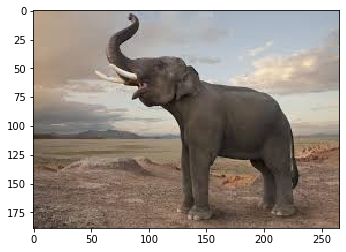

In [52]:
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [53]:
print(im.shape)
# that means the image is in 3D that is RGB values

(189, 266, 3)


In [54]:
# Creating a 1 d array for every chanel i.e RGB
all_pixels=im.reshape(-1,3)

In [55]:
print(all_pixels.shape)

(50274, 3)


In [56]:
from sklearn.cluster import KMeans

In [57]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
centers=km.cluster_centers_

In [60]:
print(centers)
# These are the dominant colours pixel values we have obtained from kmeans

[[168.99228792 153.88742502 140.2010497 ]
 [ 71.86353601  61.47291101  53.64580503]
 [190.86616908 191.54914277 190.32175584]
 [126.44254639 107.08579655  93.03314139]]


###  As pixel values vary from 0-255 i.e. positive whole numbers of 8 bits 

In [61]:
centers=np.array(centers,dtype='uint8')

In [63]:
# Now these look as pixel values
print(centers)

[[168 153 140]
 [ 71  61  53]
 [190 191 190]
 [126 107  93]]


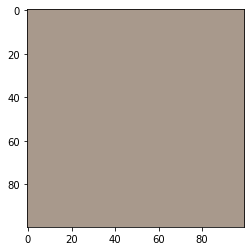

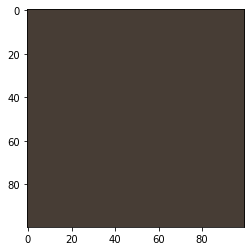

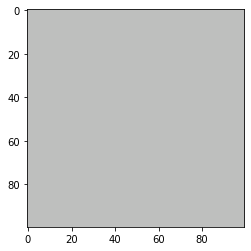

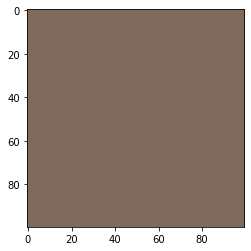

In [70]:
for each_col in centers:
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    plt.show()

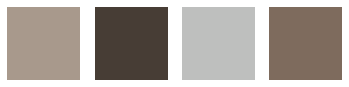

In [74]:
i=1
colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('Off')# TO remove the axis 
    i+=1
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

## Segmenting Our Original Image into The 4 Colours Extracted using Kmeans

In [78]:
new_img=np.zeros(((189*266),3),dtype='uint8')

In [79]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [81]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]

In [83]:
new_img=new_img.reshape(189,266,3)

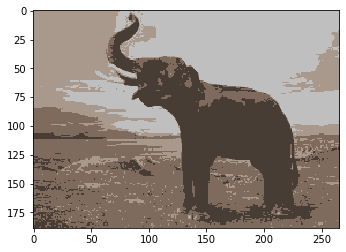

In [84]:
plt.imshow(new_img)